<a href="https://colab.research.google.com/github/Soumya199803/Machine-Learning-projects/blob/main/Miniprjct(iris_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1: Installing required libraries**

In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn


**2: Loading dataset**

In [ ]:
#If we want to avoid downloading manually, you can load the Iris dataset directly within your Python code using scikit-learn

In [ ]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Access the data and target labels
X = iris.data
y = iris.target

# Convert it to a pandas DataFrame
import pandas as pd
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target_names[y]

# Display the first few rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


**3: Data Exploration and Visualization**

In [ ]:
#Before building the model, it's good to understand the data using visualizations.

#seaborn is usually used for visualizing and understanding data, model performance

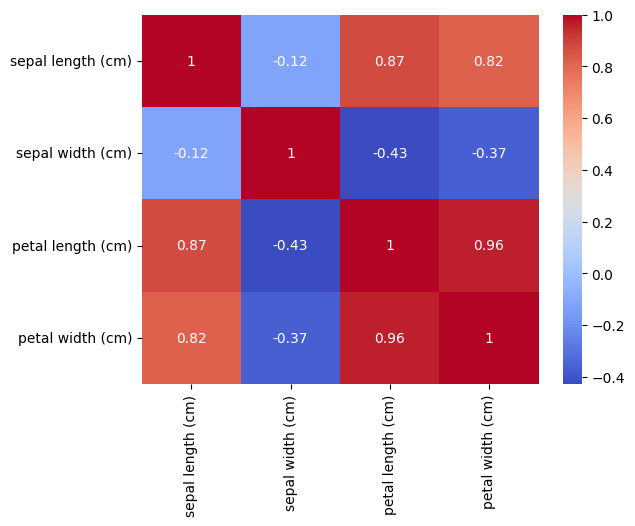

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Pairplot to see relationships between features
#sns.pairplot(df, hue="species")
#plt.show()

# Heatmap of correlations
#sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
#plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute and plot correlation matrix
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()



**4: Preprocessing and Splitting the Data**

In [ ]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**5: Choose a Machine Learning Model**

In [ ]:
#Logistic Regression, Decision Tree, or K-Nearest Neighbors (KNN) model. Let's try using the KNN classifier, which is easy to
#understand and works well with the Iris dataset.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier: {accuracy:.2f}")


Accuracy of KNN classifier: 1.00


**6: Fine-tuning the Model**

In [ ]:
#You can tune the model to improve its accuracy by adjusting hyperparameters, such as the number of neighbors (n_neighbors in KNN) or the depth
#of a decision tree.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters to tune
param_grid = {'n_neighbors': range(1, 11)}

# GridSearchCV to find the best n_neighbors
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Best model
best_knn = grid_search.best_estimator_

# Evaluate on test set
y_pred_best = best_knn.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of tuned KNN classifier: {accuracy_best:.2f}")


Best parameters: {'n_neighbors': 1}
Accuracy of tuned KNN classifier: 1.00


In [ ]:
# Summary of Key Outputs:
#Dataset preview: A table showing the first few rows of data with flower measurements and species.

#Accuracy of KNN classifier: Typically close to 1.0 (100%) for simple datasets like Iris.

#Hyperparameter tuning result: Shows the best value for n_neighbors and the resulting accuracy.

#Decision boundary plot: A visual representation of how the classifier
#is distinguishing between species in the 2D feature space.